# **Evolutionary Computing, lab 2 - Report**

**Authors**:
* **Kuba Czech**, 156035
* **Wojciech Nagórka**, 156045

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **1. Description of the problem** ##

We are given a set of nodes, each defined by its x and y coordinates and an associated cost. The task is to select exactly half of the nodes (rounded up if the number is odd) and construct a Hamiltonian cycle that visits each selected node exactly once and returns to the starting node. The objective is to minimize the total sum of both the path length (computed using rounded Euclidean distances between nodes) and the costs of the selected nodes.

## **2. Pseudocode of implemented algorithms** ##

### **2.1. Data**
**Input:**
- $n$: total number of nodes  
- $nodes[i] = (x_i, y_i, cost_i)$ for $i \in [0, n-1]$: array with all nodes
- $dist[i][j] = \text{round}\!\left(\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}\right)$: euclidean distance between i-th and j-th node
- $k = \lceil n / 2 \rceil$: number of nodes to select  

**Output:**
- $route$: list of nodes forming a closed Hamiltonian cycle  
- $totalCost = \text{distance cost} + \text{node costs}$

## **3. Results of computational experiments** ##

### **3.1. Stats** ###

#### **3.1.1. Instance A** 

##### **3.1.1.1. Results**

In [2]:
stats = pd.read_csv('TSPA_stats.csv')
stats

,method_name,min,max,avg,sd
0,weighted_regret_cycle,71108.0,73395.0,72129.71,502.78
1,pure_regret_cycle,105692.0,126951.0,115579.34,3397.21
2,weighted_regret_flexibleNN,70010.0,75452.0,72401.34,1409.01
3,pure_regret_flexibleNN,106373.0,126570.0,116659.01,3254.31


##### **3.1.1.2. Comparison with results from previous labs**

In [15]:
stats_lab1 = pd.read_csv('../../lab1/evaluation/TSPA_stats.csv')
stats_lab2 = pd.read_csv('TSPA_stats.csv')
pd.concat([stats_lab1, stats_lab2]).reset_index(drop=True)

,method_name,min,max,avg,sd
0,random_sol,244587.0,293506.0,264961.97,10112.85
1,nn_at_end,83182.0,89433.0,85108.51,1084.77
2,nn_flexible,71488.0,74410.0,72635.98,641.89
3,greedy_cycle,71488.0,74410.0,72635.98,641.89
4,weighted_regret_cycle,71108.0,73395.0,72129.71,502.78
5,pure_regret_cycle,105692.0,126951.0,115579.34,3397.21
6,weighted_regret_flexibleNN,70010.0,75452.0,72401.34,1409.01
7,pure_regret_flexibleNN,106373.0,126570.0,116659.01,3254.31


#### **3.1.2. Instance B** 

##### **3.1.2.1. Results**

In [3]:
stats = pd.read_csv('TSPB_stats.csv')
stats

,method_name,min,max,avg,sd
0,weighted_regret_cycle,47144.0,55700.0,50897.11,1902.16
1,pure_regret_cycle,67809.0,78406.0,72740.01,1793.29
2,weighted_regret_flexibleNN,44891.0,55247.0,47653.79,1764.00
3,pure_regret_flexibleNN,67121.0,79013.0,73646.82,2268.41


#### **3.1.2.2. Comparison with results from previous labs**

In [14]:
stats_lab1 = pd.read_csv('../../lab1/evaluation/TSPB_stats.csv')
stats_lab2 = pd.read_csv('TSPB_stats.csv')
pd.concat([stats_lab1, stats_lab2]).reset_index(drop=True)

,method_name,min,max,avg,sd
0,random_sol,192511.0,237623.0,213299.91,8832.87
1,nn_at_end,52319.0,59030.0,54390.43,1418.59
2,nn_flexible,49001.0,57324.0,51400.60,1450.12
3,greedy_cycle,49001.0,57324.0,51400.60,1450.12
4,weighted_regret_cycle,47144.0,55700.0,50897.11,1902.16
5,pure_regret_cycle,67809.0,78406.0,72740.01,1793.29
6,weighted_regret_flexibleNN,44891.0,55247.0,47653.79,1764.00
7,pure_regret_flexibleNN,67121.0,79013.0,73646.82,2268.41


### **3.2. Times** ###

#### **3.2.1. Instance A**

In [4]:
times = pd.read_csv('TSPA_times.csv')
times.rename(columns={'time': 'time (ms)'}, inplace=True)
times

,method_name,time (ms)
0,weighted_regret_cycle,4724
1,pure_regret_cycle,4757
2,weighted_regret_flexibleNN,4849
3,pure_regret_flexibleNN,4713


#### **3.2.2. Instance B**

In [9]:
times = pd.read_csv('TSPB_times.csv')
times.rename(columns={'time': 'time (ms)'}, inplace=True)
times

,method_name,time (ms)
0,weighted_regret_cycle,4676
1,pure_regret_cycle,4758
2,weighted_regret_flexibleNN,4578
3,pure_regret_flexibleNN,4639


## **4. 2D Visualization** ##

### **Reading TSP A and TSP B instances** ##

In [16]:
tsp_a = pd.read_csv('../../data/TSPA.csv', sep=';', header=None)
tsp_a.columns = ['x', 'y', 'cost']

tsp_b = pd.read_csv('../../data/TSPB.csv', sep=';', header=None)
tsp_b.columns = ['x', 'y', 'cost']

### **Reading files with best solutions** ##

In [21]:
tsp_a_pure_regret_cycle = np.array(pd.read_csv('results/TSPA_pure_regret_cycle.csv', sep=';', header=None).values).flatten()
tsp_a_pure_regret_flexible = np.array(pd.read_csv('results/TSPA_pure_regret_flexibleNN.csv', sep=';', header=None).values).flatten()
tsp_a_weighted_regret_cycle = np.array(pd.read_csv('results/TSPA_weighted_regret_cycle.csv', sep=';', header=None).values).flatten()
tsp_a_weighted_regret_flexible = np.array(pd.read_csv('results/TSPA_weighted_regret_flexibleNN.csv', sep=';', header=None).values).flatten()

In [22]:
tsp_b_pure_regret_cycle = np.array(pd.read_csv('results/TSPB_pure_regret_cycle.csv', sep=';', header=None).values).flatten()
tsp_b_pure_regret_flexible = np.array(pd.read_csv('results/TSPB_pure_regret_flexibleNN.csv', sep=';', header=None).values).flatten()
tsp_b_weighted_regret_cycle = np.array(pd.read_csv('results/TSPB_weighted_regret_cycle.csv', sep=';', header=None).values).flatten()
tsp_b_weighted_regret_flexible = np.array(pd.read_csv('results/TSPB_weighted_regret_flexibleNN.csv', sep=';', header=None).values).flatten()

In [41]:
def plot_tsp(tsp, solution, title):
    unused_nodes = np.array(set(tsp.index).difference(solution))
    X = tsp['x'].loc[solution].values
    Y = tsp['y'].loc[solution].values
    costs = tsp['cost'].loc[solution].values

    X_unused = tsp['x'].loc[unused_nodes].values
    Y_unused = tsp['y'].loc[unused_nodes].values
    costs_unused = tsp['cost'].loc[unused_nodes].values

    plt.figure(figsize=(15, 9))
    plt.scatter(X, Y, s=costs, color='red', alpha=0.4, label='Data points')
    plt.scatter(X_unused, Y_unused, s=costs_unused, color="grey", alpha=0.4, label="Unused nodes")
    plt.scatter(X, Y, color='blue')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.plot(X, Y, color='blue', linestyle='-', linewidth=2, label='Connecting line')

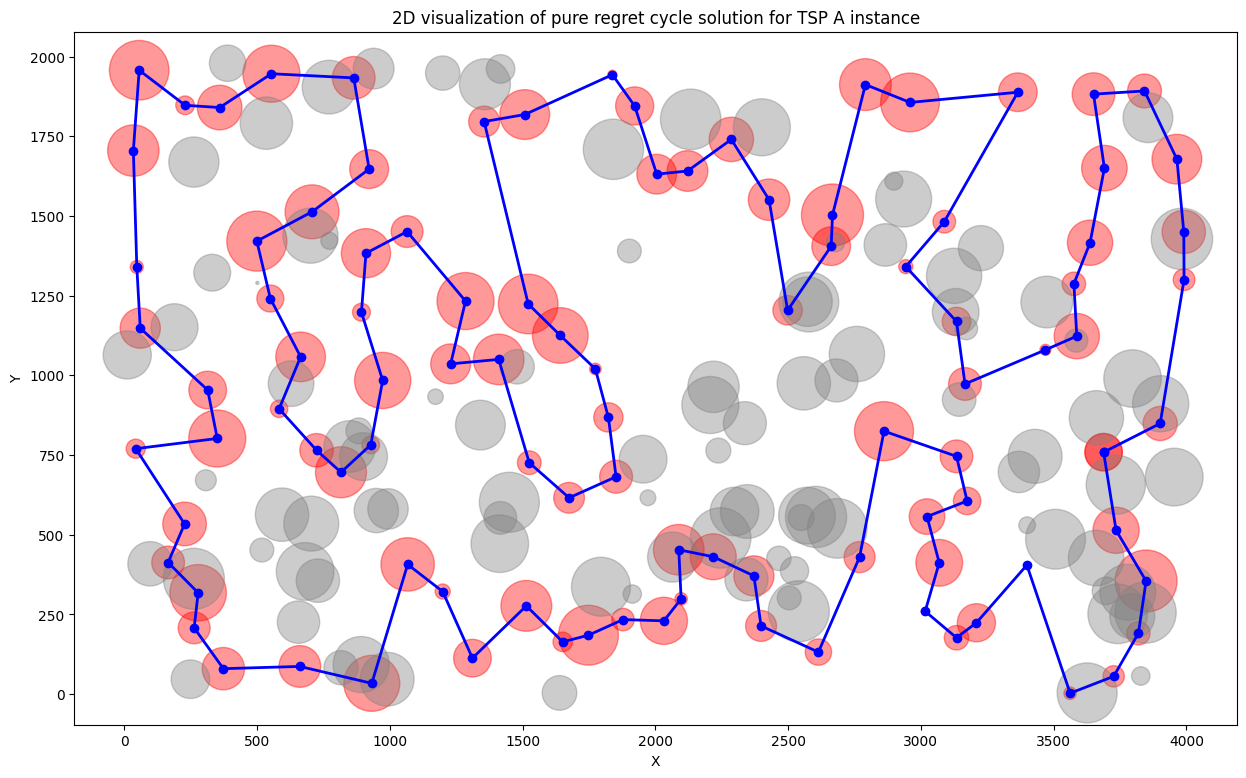

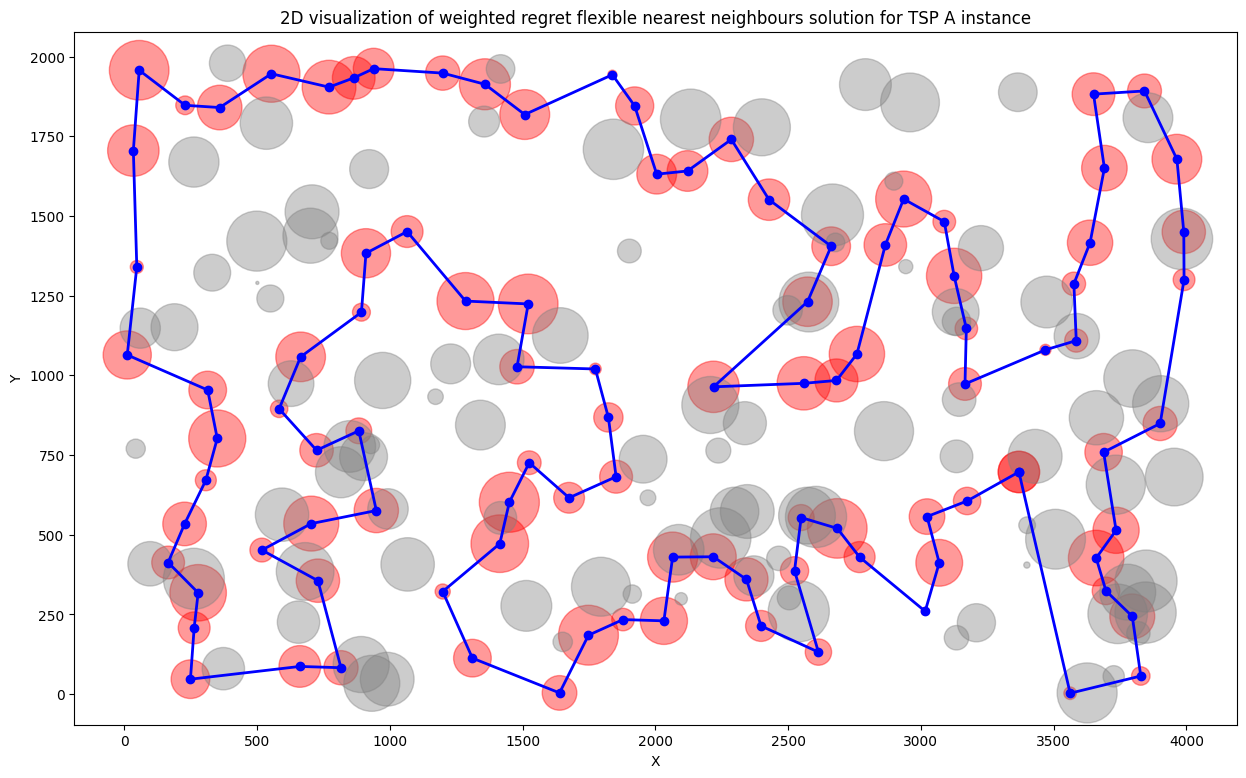

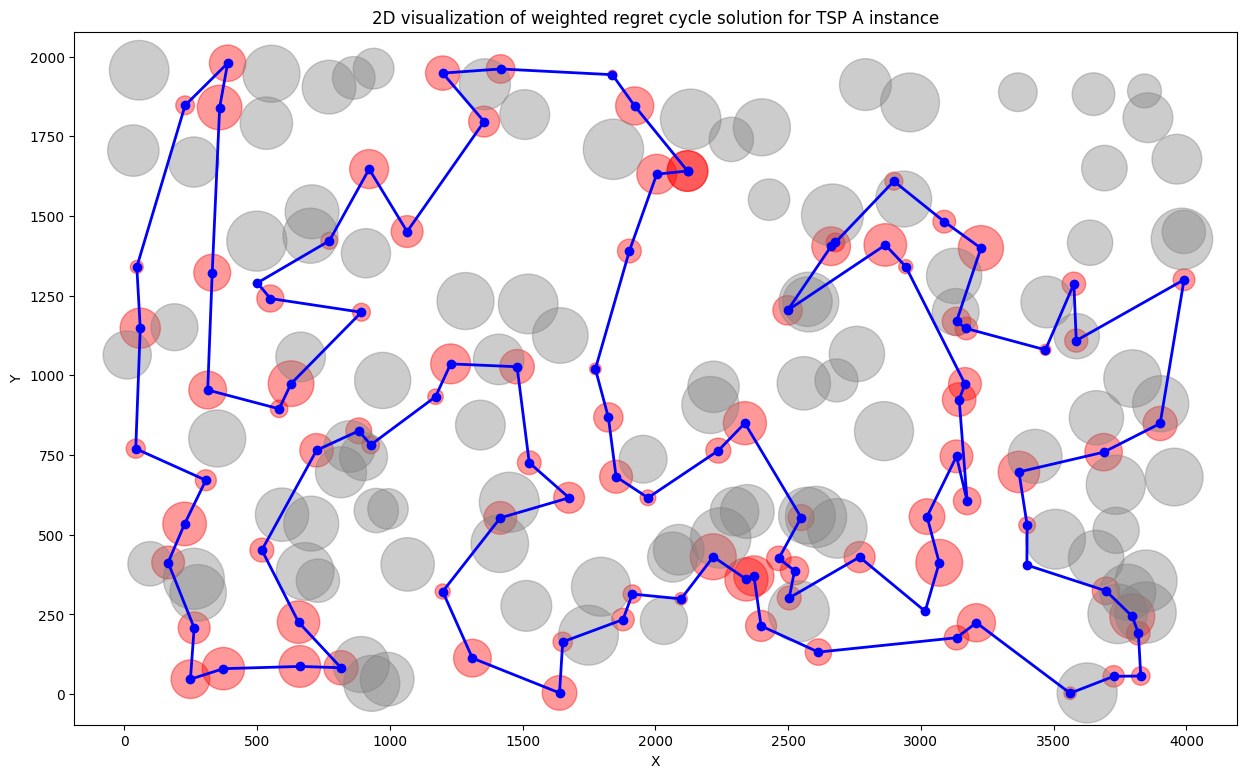

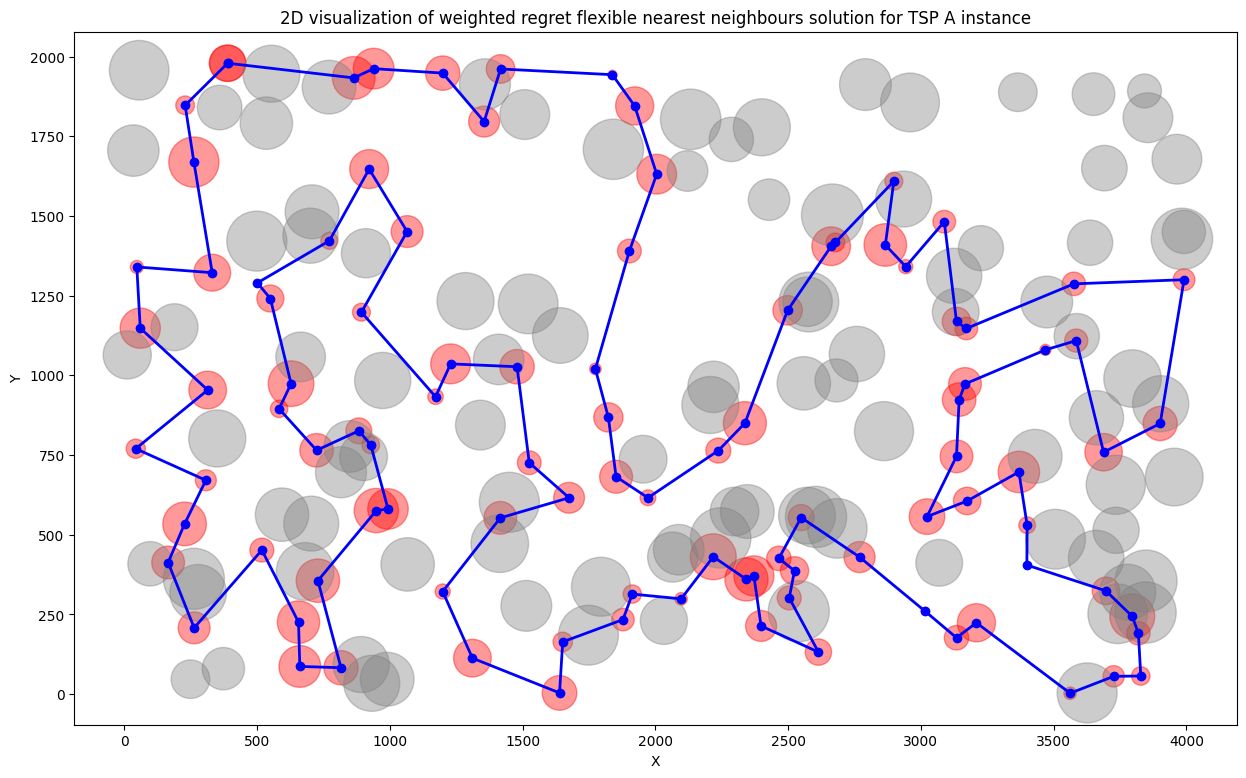

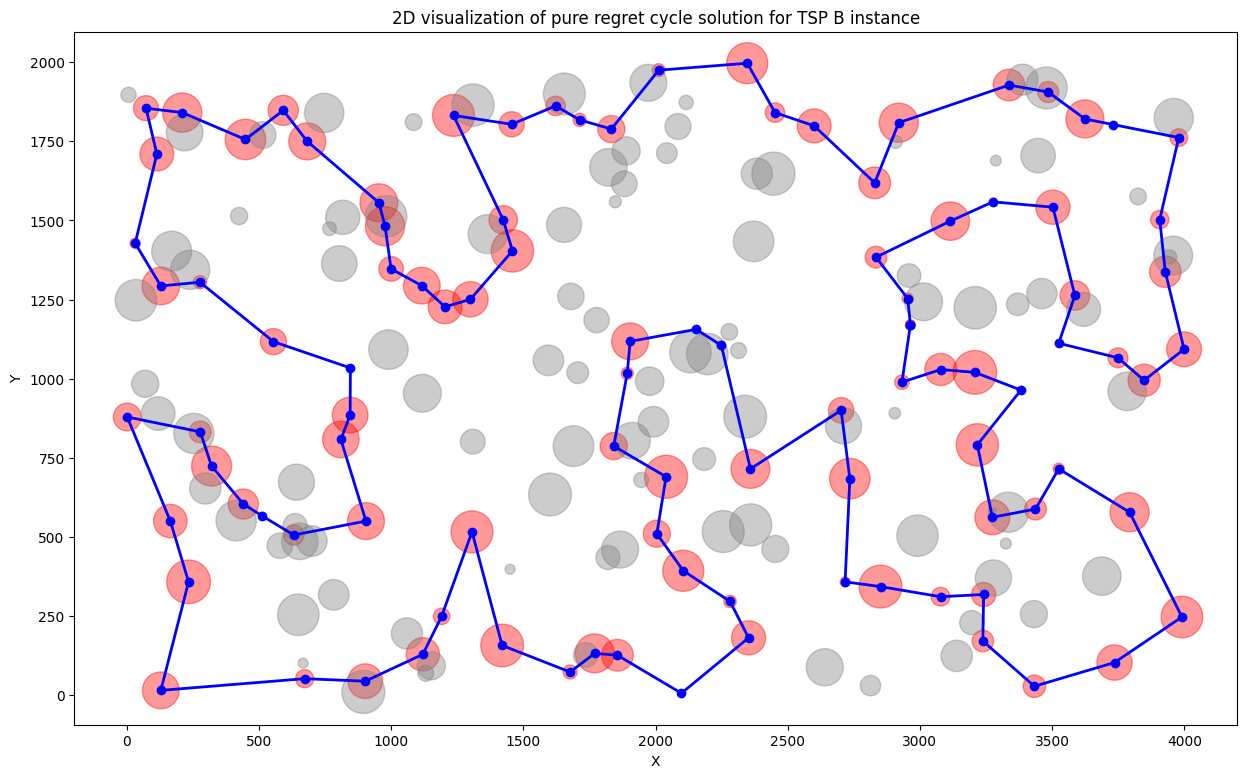

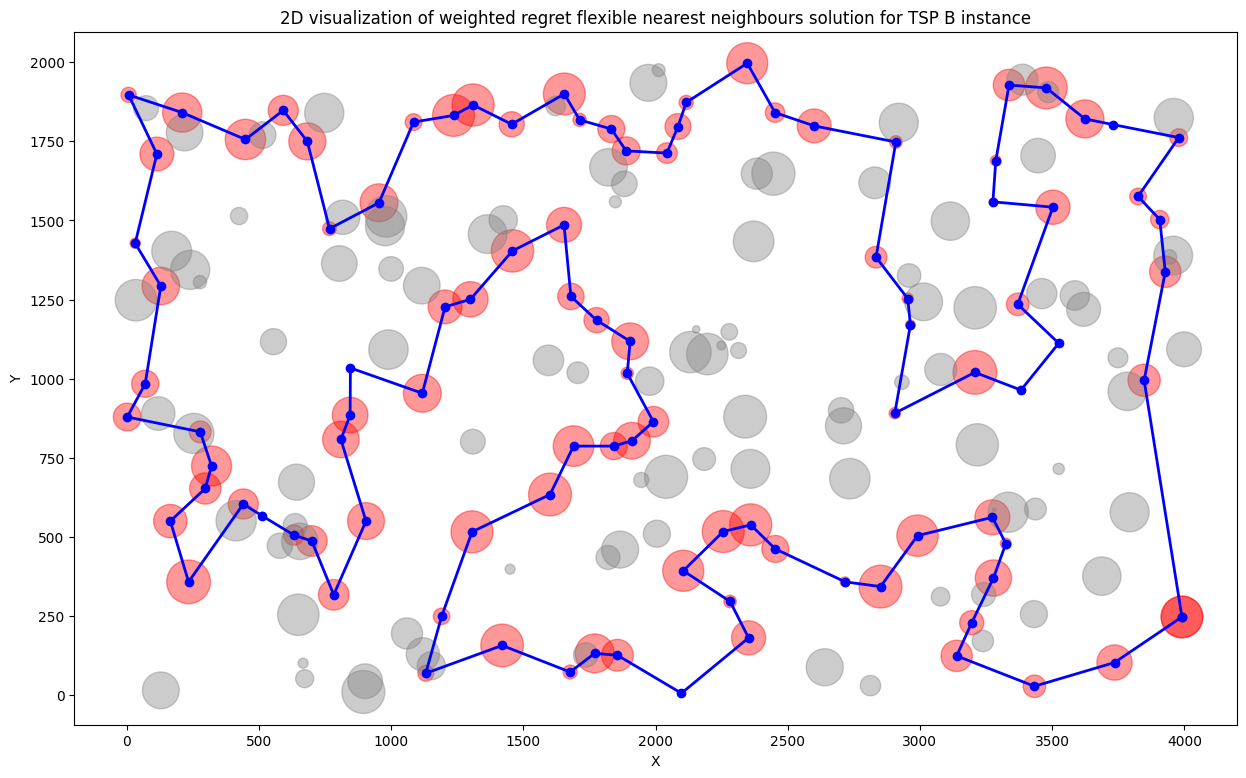

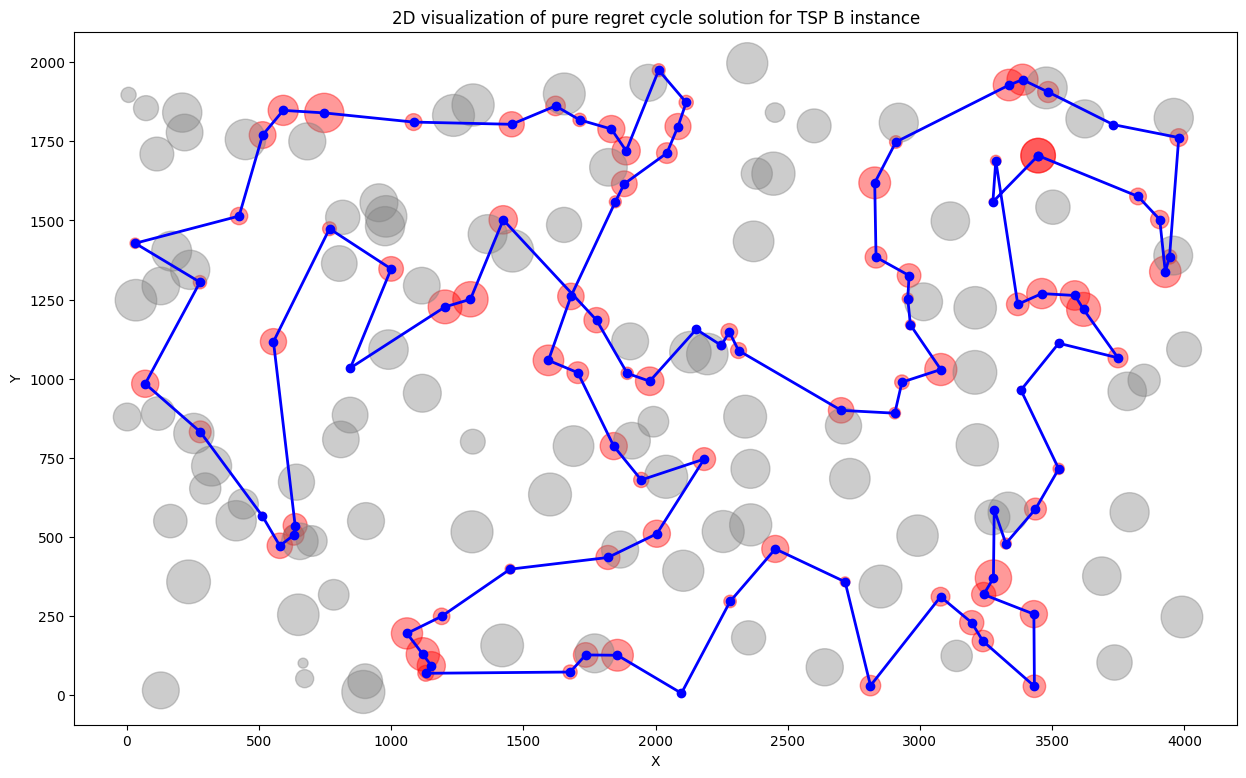

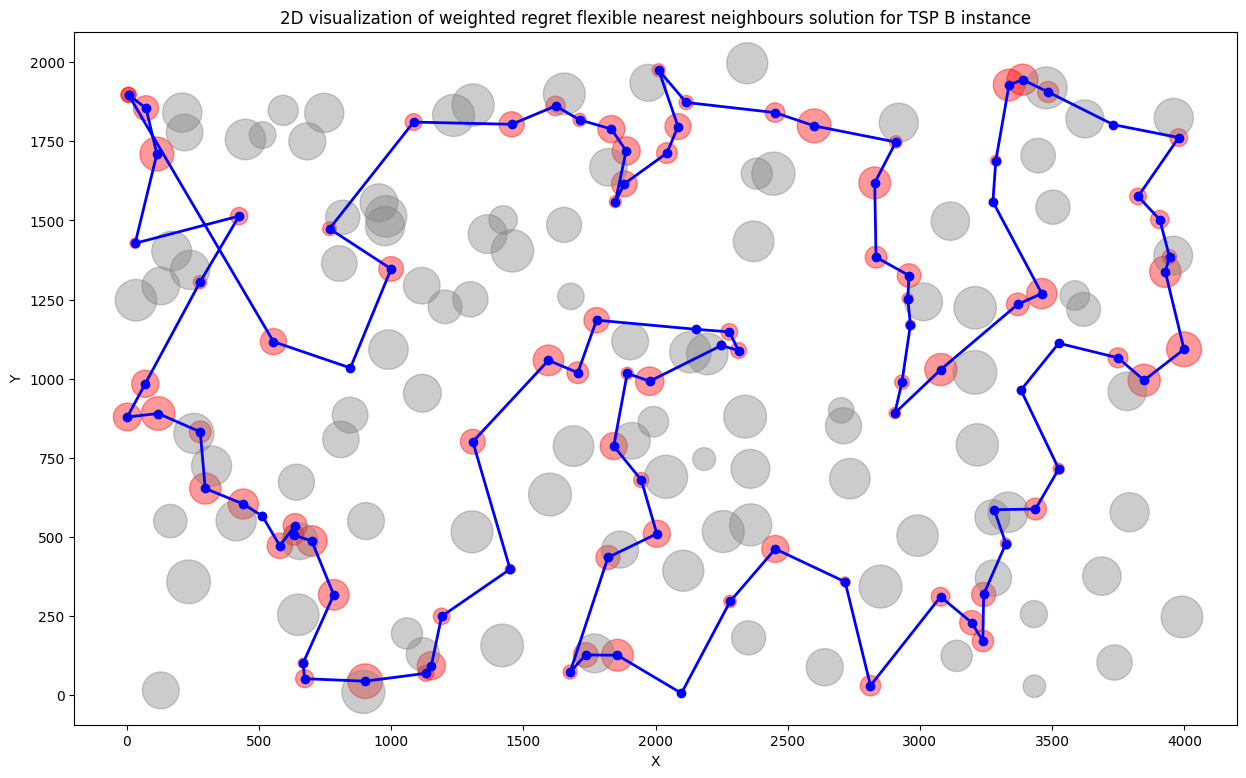

In [42]:
instances = [
    (tsp_a, tsp_a_pure_regret_cycle, '2D visualization of pure regret cycle solution for TSP A instance'),
    (tsp_a, tsp_a_pure_regret_flexible, '2D visualization of weighted regret flexible nearest neighbours solution for TSP A instance'),
    (tsp_a, tsp_a_weighted_regret_cycle, '2D visualization of weighted regret cycle solution for TSP A instance'),
    (tsp_a, tsp_a_weighted_regret_flexible, '2D visualization of weighted regret flexible nearest neighbours solution for TSP A instance'),
    (tsp_b, tsp_b_pure_regret_cycle, '2D visualization of pure regret cycle solution for TSP B instance'),
    (tsp_b, tsp_b_pure_regret_flexible, '2D visualization of weighted regret flexible nearest neighbours solution for TSP B instance'),
    (tsp_b, tsp_b_weighted_regret_cycle, '2D visualization of pure regret cycle solution for TSP B instance'),
    (tsp_b, tsp_b_weighted_regret_flexible, '2D visualization of weighted regret flexible nearest neighbours solution for TSP B instance')
]
for i in instances:
    plot_tsp(*i)

## **5. Display of the results** ##

### **5.1. TSP A instance** ###

#### **5.1.1. ... solution** ####

In [44]:
tsp_a_pure_regret_cycle

array([196, 157, 188, 113, 171,  16,  78,  25,  44, 120,  82, 129,  92,
        57, 172,   2,  75,  86,  26, 121, 182,  53, 158, 154,   6, 135,
       194, 127, 123,  24, 156,   4, 190, 177, 104,  54,  48,  34, 192,
       181, 146,  22,  20, 134,  18,  69,  67, 140,  68, 110, 142,  41,
        96,  42,  43,  77,  65, 197, 115, 198,  46,  60, 118, 109, 151,
       133,  79,  80, 176,  66, 141,   0, 153, 183,  89,  23, 186, 114,
        15, 148,   9,  61,  73, 132,  21,  14,  49, 178,  52, 185, 119,
       165,  39,  95,   7, 164,  71,  27,  90,  81, 196])

#### **5.1.2. ... solution** ####

In [45]:
tsp_a_pure_regret_flexible

array([179,  92, 129,  82, 120,   2,  87, 152,   1,  75,  86, 100, 121,
       136, 158, 154,   6,  70, 127, 123, 161,  45, 151, 133,  79,  80,
       176,  51, 141,  60,  46, 198, 115,  96,  42,  43, 116, 131, 166,
       184,  35, 112,   4,  10, 177, 104,  54,  48, 160, 192, 181, 103,
        22,  20, 134,  18,  69,  67,  36, 140,  93, 117, 170, 153, 183,
        89,  23, 186, 114,  15,   9,  37,  12, 111, 167, 128, 102, 155,
        14,  32, 106,  52, 185,  40, 165,  39,  95,   7, 164,  71,  27,
        90,  81, 196, 157,  38,  31,  56, 175,  16, 179])

#### **5.1.3. ... solution** ####

In [46]:
tsp_a_weighted_regret_cycle

array([186,  89, 183, 143, 117,   0,  46,  68, 139, 193,  41, 115,   5,
        42, 181, 159,  69, 108,  18,  22, 146,  34, 160,  48,  54, 177,
        10, 190,   4, 112,  84, 184,  43, 116,  65,  59, 118,  51, 151,
       133, 162, 123, 127,  70, 135, 154, 180,  53, 121, 100,  26,  86,
        75,  44,  25,  16, 171, 175, 113,  56,  31,  78, 145, 179, 196,
        81,  90,  40, 165, 185, 106, 178, 138,  14, 144,  62,   9, 148,
       102,  49,  52,  55,  92,  57, 129,  82, 120,   2, 101,   1,  97,
       152, 124,  94,  63,  79,  80, 176, 137,  23, 186])

#### **5.1.4. ... solution** ####

In [47]:
tsp_a_weighted_regret_flexible

array([108,  18, 199, 159,  22, 146, 181,  34, 160,  48,  54, 177, 184,
        84,   4, 112,  35, 131, 149,  65, 116,  43,  42,   5,  41, 193,
       139,  68,  46, 115,  59, 118,  51, 151, 133, 162, 123, 127,  70,
       135, 154, 180,  53, 121, 100,  26,  86,  75, 101,   1,  97, 152,
         2, 120,  44,  25,  16, 171, 175, 113,  56,  31,  78, 145, 179,
        92, 129,  57,  55,  52, 185,  40, 196,  81,  90, 165, 106, 178,
        14,  49, 102, 144,  62,   9, 148, 124,  94,  63,  79,  80, 176,
       137,  23,  89, 183, 143,   0, 117,  93, 140, 108])

### **5.2. TSP B instance** ###

#### **5.2.1. ... solution** ####

In [50]:
tsp_b_pure_regret_cycle

array([ 62, 124, 128, 110,  86,  64, 180, 194, 166,  48,  93,  75, 137,
       127, 103, 163, 186, 153, 119, 143,  41,   0,  29,  49,  33, 104,
        68,  82,  58,  77,  97, 141,  91,  79,  36,   7, 123,   5, 142,
       162,  80, 108, 196,  42,  27,   1,  24, 198, 117,  31, 173,  19,
       112, 121, 131, 135, 102,  63, 100, 107,  17,  44,  10, 178,  71,
       120,  51,  98, 118,  74,   2, 134, 192,   6, 188, 169, 132,  70,
        84, 155, 184, 170,  53,   4,  28,  59,  20,  60,  47,  66,  57,
       172, 179, 185,  99,   9, 183, 174,  34,  18,  62])

#### **5.2.2. ... solution** ####

In [51]:
tsp_b_pure_regret_flexible

array([ 93,  75, 137, 165,  89,  26, 113, 180, 129, 186, 153,  81,  14,
        50,  58,  77,  97, 141,  91,  79,  36,   7, 175,   5, 123, 171,
       157, 104,  56, 144,  33,  49,  11, 139,  43,   2,  74, 118, 158,
       121, 112,  19, 173, 136,  73,  31, 117, 198, 196,  42, 156,  24,
         1,  27,  38, 102,  63, 100,  40,  17,  44,  10, 178,  90,  71,
       147, 192, 150,   6,  65, 169, 132,  13, 145,  15,   3,  84, 155,
       184, 152,  34,  18,  62, 106, 110,  86, 185,  95,   9, 183, 140,
         4, 101,  59,  20,  60, 148,  47,  66, 172,  93])

#### **5.2.3. ... solution** ####

In [52]:
tsp_b_weighted_regret_cycle

array([199, 183, 140,  95, 130,  99,  22, 179, 185,  86, 166, 194, 113,
       176,  26, 103, 114, 137, 127,  89, 163, 187, 153,  81,  77, 141,
        91,  61,  36, 175,  78, 142,  45,   5, 177,  21,  82, 111,   8,
       104, 138, 182, 139, 168, 195, 145,  15,   3,  70,  13, 132, 169,
       188,   6, 147, 115,  10, 133, 122,  63, 135,  38,   1, 117, 193,
        31,  54, 131,  90,  51, 121, 118,  74, 134,  11,  33, 160,  29,
         0, 109,  35, 143, 106, 124, 128,  62,  18,  55,  34, 170, 152,
         4, 149,  28,  20,  60,  94,  66,  47, 148, 199])

#### **5.2.4. ... solution**

In [49]:
tsp_b_weighted_regret_flexible

array([ 40, 107, 100,  63, 122, 135,  38,  27,  16,   1, 156, 198, 117,
       193,  54,  31,  73, 136, 190,  80, 162, 175,  78,   5, 177,  25,
       182, 138,  11,  29, 109,  35,   0, 160,  33, 104,   8,  82,  21,
        36,  61,  91, 141,  77,  81, 153, 187, 163,  89, 127, 103, 113,
       176, 194, 166,  86, 185, 179, 172,  57,  66,  94,  47, 148,  60,
        20,  28, 149,   4, 140, 183, 130,  95, 128, 106, 124,  62,  18,
        55,  34, 170, 152, 184, 155,   3,  70,  15, 145, 195, 168,  13,
       132, 169, 188,   6, 147,  90,  51, 121, 131,  40])

## **6. Usage of solution checker**

Solution checker was used for all computed above solutions and value of objective functions are correct.

## **7. Link to the source code** ##

https://github.com/WojtekNagorka/Evolutionary-computation/tree/main/lab2

## **8. Conclusions**

**TODO**